ref: Python machine learning : machine learning and deep learning with Python, scikit-learn, and TensorFlow (Raschka SMirjalili V)

In [ ]:
import numpy as np

In [140]:
class Perceptron:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        size = 1+X.shape[1]
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target-self.predict(xi))
                self.w_[1:] += update*xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >=0.0, 1, -1) 

In [141]:
import pandas as pd
import requests
from io import StringIO

res = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', verify=False)
data = StringIO(res.text)
df = pd.read_csv(data, header=None)
df.head(5)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'archive.ics.uci.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [142]:
len(df)

150

In [143]:
import matplotlib.pyplot as plt

target_df = df[(df[4]=='Iris-setosa')|(df[4]=='Iris-versicolor')]
target_df.shape

(100, 5)

In [144]:
target_df[4].unique()

array(['Iris-setosa', 'Iris-versicolor'], dtype=object)

In [145]:
y = target_df.iloc[:,4].values
y = np.where(y=='Iris-setosa', -1, 1)

In [146]:
X = target_df.iloc[:,[0,2]].values
X.shape

(100, 2)

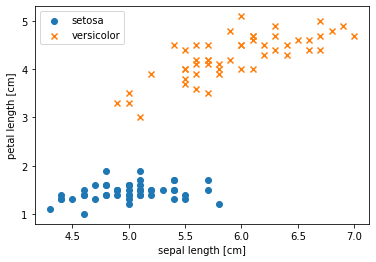

In [147]:
plt.scatter(X[:50,0], X[:50,1], marker='o', label='setosa');
plt.scatter(X[50:,0], X[50:,1], marker='x', label='versicolor');
plt.xlabel('sepal length [cm]');
plt.ylabel('petal length [cm]');
plt.legend(loc='upper left');

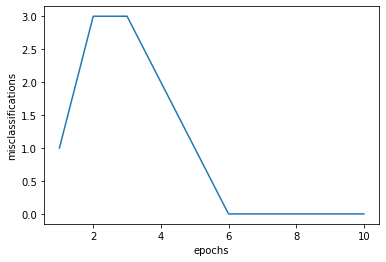

In [148]:
ppn = Perceptron(n_iter=10)
ppn.fit(X,y)
plt.plot(range(1,len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('epochs');
plt.ylabel('misclassifications');
plt.show();

In [149]:
import matplotlib as mpl

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v') 
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = mpl.colors.ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min()-1, X[:, 0].max()+1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max()+1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) 
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0],
                    y=X[y==cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black'
                   )

/var/folders/8k/07c2mpg56x7c31_26k0qj2y00000gn/T/ipykernel_16079/4203121767.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl, 0],


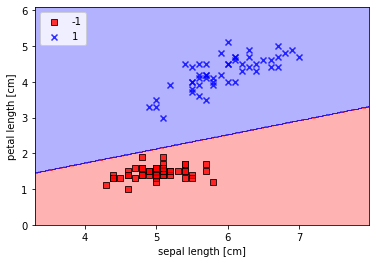

In [150]:
plot_decision_regions(X,y,ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show();

In [107]:
class AdalineGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        size = 1+X.shape[1]
        self.costs_ = []
        
        for _ in range(self.n_iter):
            output = self.act_fn(self.net_input(X))
            error = (y-output)
            self.w_[1:] += self.eta * X.T.dot(error)
            self.w_[0] += self.eta * error.sum()
            cost = (error**2).sum()/2.0
            self.costs_.append(cost)
        
        return self
    
    def act_fn(self,X):
        return X
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >=0.0, 1, -1) 

Text(0.5, 1.0, 'Adaline - Learning rate 0.0001')

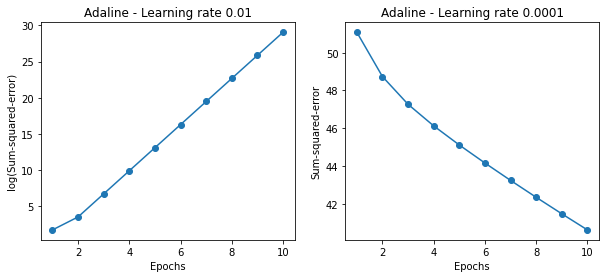

In [116]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.costs_) + 1),np.log10(ada1.costs_), marker='o');
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)');
ax[0].set_title('Adaline - Learning rate 0.01');

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.costs_) + 1),ada2.costs_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

In [117]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

In [119]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y);

/var/folders/8k/07c2mpg56x7c31_26k0qj2y00000gn/T/ipykernel_16079/2947950672.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl, 0],


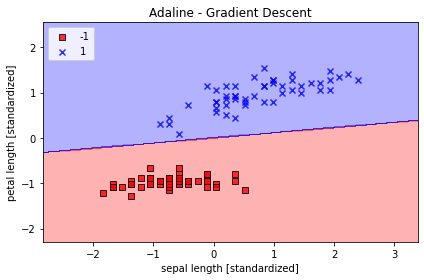

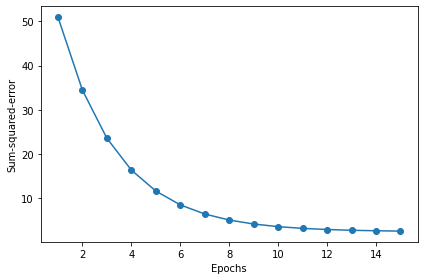

In [130]:
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left');
plt.tight_layout()
plt.show();

plt.plot(range(1, len(ada.costs_) + 1), ada.costs_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.tight_layout()
plt.show();

In [162]:
class AdalineSGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1, shuffle=True):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def _update_weights(self, xi, target):
        output = self.act_fn(self.net_input(xi))
        error = (target-output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5*error**2
        return cost
    
    def _initialize_weights(self, m):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1+m)
        self.w_initialized = True
    
    def _shuffle(self, X, y):
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
        
    def fit(self, X, y):
        self._initialize_weights(X.shape[1])
        self.costs_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi,target))
            avg_cost = sum(cost)/len(y)
            self.costs_.append(avg_cost)
                
        return self
    
    def act_fn(self,X):
        return X
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >=0.0, 1, -1) 
    
    def partial_fit(self, X, y):
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        
        return self
            

In [163]:
ada = AdalineSGD(n_iter=15, eta=0.01)
ada.fit(X_std, y);

/var/folders/8k/07c2mpg56x7c31_26k0qj2y00000gn/T/ipykernel_16079/4203121767.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl, 0],


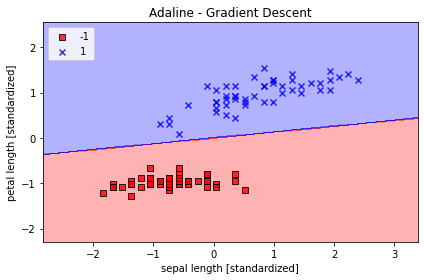

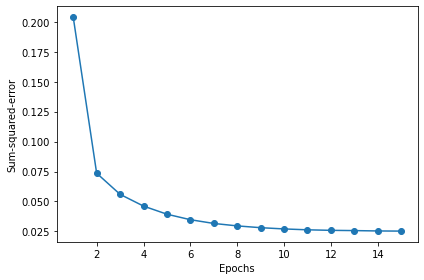

In [164]:
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left');
plt.tight_layout()
plt.show();

plt.plot(range(1, len(ada.costs_) + 1), ada.costs_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.tight_layout()
plt.show();